In [1]:
import numpy as np
from scipy import integrate
from astropy.modeling.models import BlackBody
from astropy import units as u
import matplotlib.pyplot as plt

%matplotlib inline

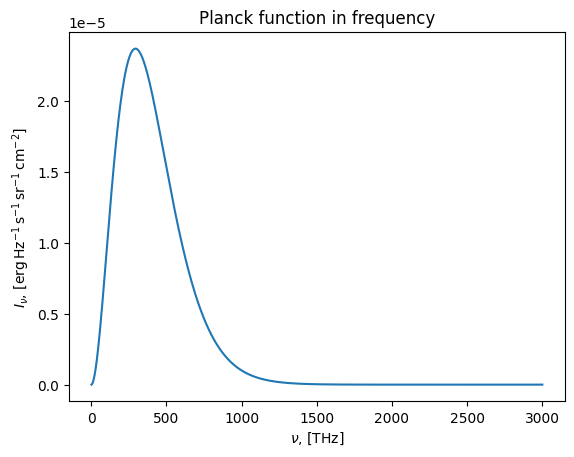

In [2]:
bb = BlackBody(5000.0 * u.Kelvin)

nu = np.linspace(1.0, 3000.0, 1000) * u.THz
bb5000K_nu = bb(nu)
plt.plot(nu, bb5000K_nu)
plt.xlabel(r"$\nu$, [{0:latex_inline}]".format(nu.unit))
plt.ylabel(r"$I_{\nu}$, " + "[{0:latex_inline}]".format(bb5000K_nu.unit))
plt.title("Planck function in frequency")
plt.show()

In [7]:
np.trapezoid(x=nu, y=bb5000K_nu).to("erg s-1 cm-2 sr-1")

<Quantity 1.12808487e+10 erg / (s sr cm2)>

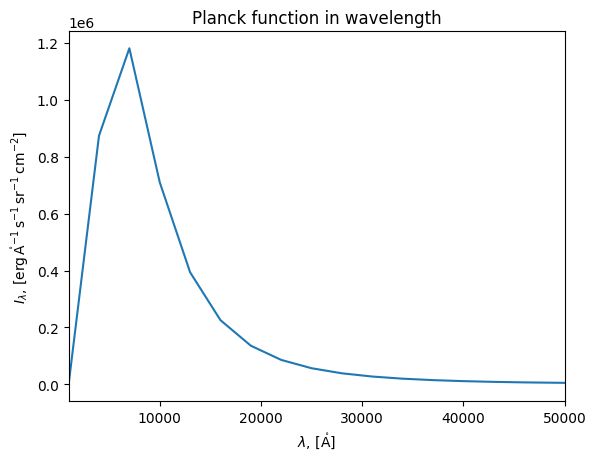

In [8]:
lam = np.linspace(
    nu.max().to(u.AA, equivalencies=u.spectral()),
    nu.min().to(u.AA, equivalencies=u.spectral()),
    1000,
)
bb_lam = BlackBody(bb.temperature, scale=1.0 * u.erg / (u.cm**2 * u.AA * u.s * u.sr))
bb5000K_lam = bb_lam(lam)
plt.plot(lam, bb5000K_lam)
plt.xlim([1.0e3, 5.0e4])
plt.xlabel(r"$\lambda$, [{0:latex_inline}]".format(lam.unit))
plt.ylabel(r"$I_{\lambda}$, " + "[{0:latex_inline}]".format(bb5000K_lam.unit))
plt.title("Planck function in wavelength")
plt.show()

In [9]:
np.trapezoid(x=lam, y=bb5000K_lam).to("erg s-1 cm-2 sr-1")

<Quantity 1.14677601e+10 erg / (s sr cm2)>

In [10]:
class PowerLawPDF(object):
    def __init__(self, gamma, B=1.0):
        self.gamma = gamma
        self.B = B

    def __call__(self, x):
        return x**self.gamma / self.B

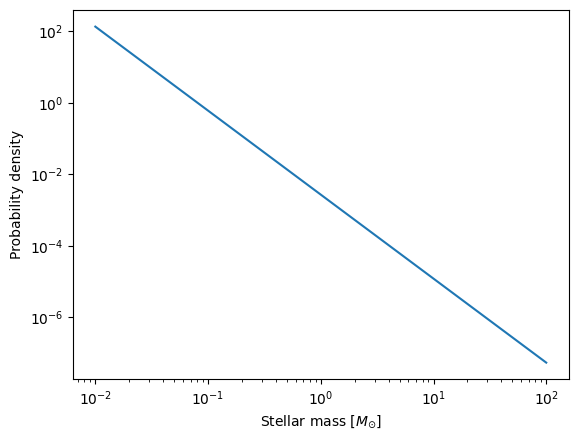

In [11]:
salpeter = PowerLawPDF(gamma=-2.35)
salpeter.B, _ = integrate.quad(salpeter, a=0.01, b=100.0)

m_grid = np.logspace(-2.0, 2.0, 100)
plt.loglog(m_grid, salpeter(m_grid))
plt.xlabel(r"Stellar mass [$M_{\odot}$]")
plt.ylabel("Probability density")
plt.show()

In [12]:
n_m, _ = integrate.quad(salpeter, a=0.01, b=0.6)
n_o, _ = integrate.quad(salpeter, a=15.0, b=100.0)
print(n_m / n_o)

20936.017868337385


In [13]:
def IMF_m(m, imf):
    return imf(m) * m


m_m, _ = integrate.quad(IMF_m, a=0.01, b=0.6, args=(salpeter,))
m_o, _ = integrate.quad(IMF_m, a=15.0, b=100.0, args=(salpeter,))

m_m / m_o

20.29197629920483